<a href="https://colab.research.google.com/github/manishwai/IMDB-Python-Project-/blob/main/IMDB_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/movies_complete.csv',parse_dates=['release_date'])

In [ ]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of            id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
44686  439050                       Subdue   
44687  111109          Century of Birthing   
44688   67758                     Betrayal   
44689  227506             Satan Triumphant   
44690  461257                     Queerama   

                                                 tagline release_date  \
0                                                    NaN   1995-10-30   
1              Roll the dice and unleash the excitement!   1995-12-15   
2      Still Yelling. Still Fighting. Still Ready for...   1995-12-22   
3      Friends are the people who let you be yourself...   1995-12-22   
4      Just When His World Is Back To Normal... He's ...   1995-02-10   
...                                                  ...          ...   
44686         Rising and falling between a man and woman          NaT   
44687                                                NaN   2011-11-17   
44688                             A deadly game of wits.   2003-08-01   
44689                                                NaN   1917-10-21   
44690                                                NaN   2017-06-09   

                         genres           belongs_to_collection  \
0       Animation|Comedy|Family            Toy Story Collection   
1      Adventure|Fantasy|Family                             NaN   
2                Romance|Comedy       Grumpy Old Men Collection   
3          Comedy|Drama|Romance                             NaN   
4                        Comedy  Father of the Bride Collection   
...                         ...                             ...   
44686              Drama|Family                             NaN   
44687                     Drama                             NaN   
44688     Action|Drama|Thriller                             NaN   
44689                       NaN                             NaN   
44690                       NaN                             NaN   

      original_language  budget_musd  revenue_musd  \
0                    en         30.0    373.554033   
1                    en         65.0    262.797249   
2                    en          NaN           NaN   
3                    en         16.0     81.452156   
4                    en          NaN     76.578911   
...                 ...          ...           ...   
44686                fa          NaN           NaN   
44687                tl          NaN           NaN   
44688                en          NaN           NaN   
44689                en          NaN           NaN   
44690                en          NaN           NaN   

                                    production_companies  ... vote_average  \
0                                Pixar Animation Studios  ...          7.7   
1      TriStar Pictures|Teitler Film|Interscope Commu...  ...          6.9   
2                            Warner Bros.|Lancaster Gate  ...          6.5   
3                 Twentieth Century Fox Film Corporation  ...          6.1   
4              Sandollar Productions|Touchstone Pictures  ...          5.7   
...                                                  ...  ...          ...   
44686                                                NaN  ...          4.0   
44687                                        Sine Olivia  ...          9.0   
44688                            American World Pictures  ...          3.8   
44689                                          Yermoliev  ...          NaN   
44690                                                NaN  ...          NaN   

       popularity  runtime                                           overview  \
0       21.946943     81.0  Led by Woody, Andy's toys live happi

In [ ]:
df.isnull().sum()


id                           0
title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

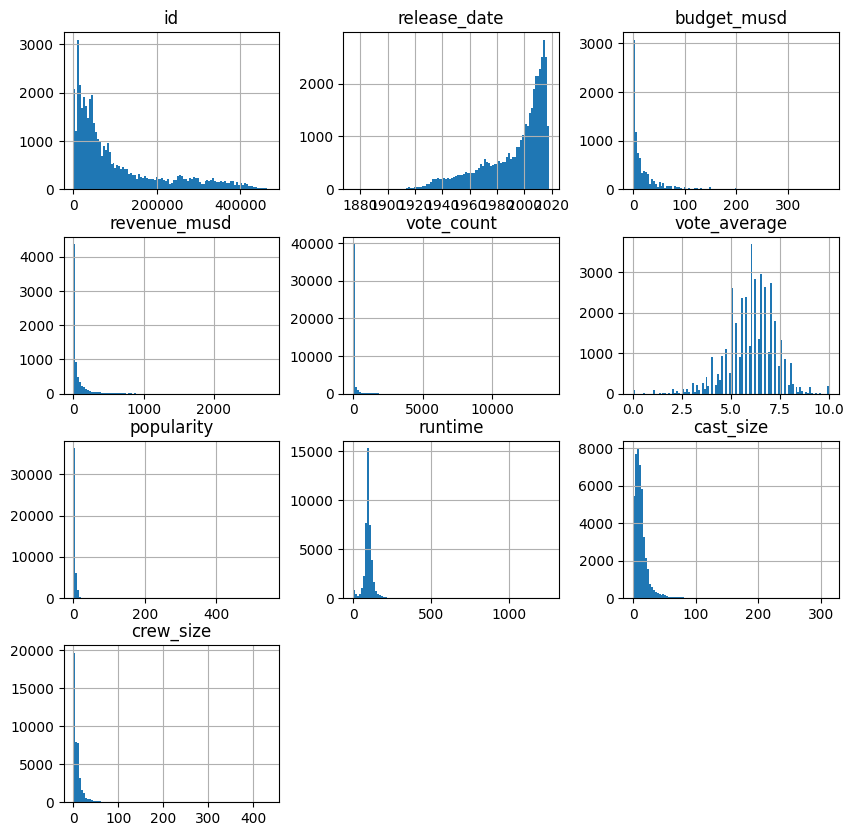

In [ ]:
df.hist(figsize=(10,10),bins=100)
plt.show()

In [ ]:
from IPython.display import HTML
subset = df[['poster_path','title','popularity']].head()
HTML(subset.to_html(escape=False))

,poster_path,title,popularity
0,,Toy Story,21.946943
1,,Jumanji,17.015539
2,,Grumpier Old Men,11.712900
3,,Waiting to Exhale,3.859495
4,,Father of the Bride Part II,8.387519


# **The Best and Worst Movies ever**

The best and worst movie by reveneue , profit , budget , ROI , No of votes , popularity ,rating

In [ ]:
edf = df[
    ['poster_path','title','budget_musd','revenue_musd','vote_count','vote_average','popularity']
].copy()

In [ ]:
edf['Profit']=edf['revenue_musd']-edf['budget_musd']
edf['ROI']=edf['Profit']/edf['budget_musd']

In [ ]:
edf.columns=['Poster','Title','Budget','Revenue','Votes','Rating','Popularity','Profit','ROI']

In [ ]:
edf.set_index('Title',inplace=True)

In [ ]:
minimum_votes=edf['Votes'].median()
minimum_budget=edf['Budget'].median()

In [ ]:
edf.loc[edf['Votes']>minimum_votes].sort_values('Rating',ascending=False).head(10)

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Planet Earth II,<img src='http://image.tmdb.org/t/p/w185//gTvA...,NaN,NaN,50.0,9.5,5.651997,NaN,NaN
The Civil War,<img src='http://image.tmdb.org/t/p/w185//r4sW...,NaN,NaN,15.0,9.2,3.431403,NaN,NaN
Dilwale Dulhania Le Jayenge,<img src='http://image.tmdb.org/t/p/w185//2CAL...,13.2,100.0,661.0,9.1,34.457024,86.8,6.575758
Cosmos,<img src='http://image.tmdb.org/t/p/w185//mYrn...,NaN,NaN,41.0,9.1,0.282584,NaN,NaN
Bruce Lee: The Legend,<img src='http://image.tmdb.org/t/p/w185//fdD3...,NaN,NaN,19.0,8.9,3.475895,NaN,NaN
Kizumonogatari Part 2: Nekketsu,<img src='http://image.tmdb.org/t/p/w185//88yQ...,NaN,NaN,11.0,8.9,2.431540,NaN,NaN
Lemonade,<img src='http://image.tmdb.org/t/p/w185//m8Kr...,NaN,NaN,45.0,8.8,2.899155,NaN,NaN
Planet Earth,<img src='http://image.tmdb.org/t/p/w185//koVz...,NaN,NaN,176.0,8.8,4.501137,NaN,NaN
The Godfather Trilogy: 1972-1990,<img src='http://image.tmdb.org/t/p/w185//rwEP...,NaN,NaN,13.0,8.8,0.001429,NaN,NaN


In [ ]:
edf.loc[edf['Budget']>minimum_budget].sort_values('ROI',ascending=False).head(10)

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.5,792.965326,3359.0,7.3,19.358546,782.465326,74.520507
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.0,775.398007,6778.0,8.1,42.149697,764.398007,69.490728
Pretty Woman,<img src='http://image.tmdb.org/t/p/w185//hMVM...,14.0,463.000000,1807.0,7.0,13.348451,449.000000,32.071429
The Intouchables,<img src='http://image.tmdb.org/t/p/w185//w7Wx...,13.0,426.480871,5410.0,8.2,16.086919,413.480871,31.806221
Split,<img src='http://image.tmdb.org/t/p/w185//lli3...,9.0,276.921998,4461.0,7.0,28.920839,267.921998,29.769111
The Empire Strikes Back,<img src='http://image.tmdb.org/t/p/w185//7BuH...,18.0,538.400000,5998.0,8.2,19.470959,520.400000,28.911111
Dangal,<img src='http://image.tmdb.org/t/p/w185//p2lV...,10.4,310.000000,140.0,8.0,8.792104,299.600000,28.807692
The King's Speech,<img src='http://image.tmdb.org/t/p/w185//uQ53...,15.0,414.211549,2817.0,7.6,11.260387,399.211549,26.614103
Home Alone,<img src='http://image.tmdb.org/t/p/w185//tucP...,18.0,476.684675,2487.0,7.1,0.702543,458.684675,25.482482


In [ ]:
edf['Budget'].fillna(0,inplace=True)
edf['Votes'].fillna(0,inplace=True)

Create a Function to find Best and Worst Movies

In [ ]:
def find_movies(n,by,ascending=False,min_budget=minimum_budget,min_votes=minimum_votes):
  return edf.loc[(edf['Budget']>min_budget) & (edf['Votes']>min_votes)].sort_values(by=by,ascending=ascending).head(n)


In [ ]:
HTML(find_movies(5,by='Revenue').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,10.763566
Star Wars: The Force Awakens,,245.0,2068.223624,7993.0,7.5,31.626013,1823.223624,7.441729
Titanic,,200.0,1845.034188,7770.0,7.5,26.889070,1645.034188,8.225171
The Avengers,,220.0,1519.557910,12000.0,7.4,89.887648,1299.557910,5.907081
Jurassic World,,150.0,1513.528810,8842.0,6.5,32.790475,1363.528810,9.090192


In [ ]:
HTML(find_movies(5,by='Budget').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,,380.0,1045.713802,5068.0,6.4,27.887720,665.713802,1.751878
Pirates of the Caribbean: At World's End,,300.0,961.000000,4627.0,6.9,31.363664,661.000000,2.203333
Avengers: Age of Ultron,,280.0,1405.403694,6908.0,7.3,37.379420,1125.403694,4.019299
Superman Returns,,270.0,391.081192,1429.0,5.4,13.284712,121.081192,0.448449
Tangled,,260.0,591.794936,3419.0,7.4,14.684761,331.794936,1.276134


In [ ]:
HTML(find_movies(5,by='ROI').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,,10.5,792.965326,3359.0,7.3,19.358546,782.465326,74.520507
Star Wars,,11.0,775.398007,6778.0,8.1,42.149697,764.398007,69.490728
Pretty Woman,,14.0,463.000000,1807.0,7.0,13.348451,449.000000,32.071429
The Intouchables,,13.0,426.480871,5410.0,8.2,16.086919,413.480871,31.806221
Split,,9.0,276.921998,4461.0,7.0,28.920839,267.921998,29.769111


In [ ]:
HTML(find_movies(5,by='Profit').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,10.763566
Star Wars: The Force Awakens,,245.0,2068.223624,7993.0,7.5,31.626013,1823.223624,7.441729
Titanic,,200.0,1845.034188,7770.0,7.5,26.889070,1645.034188,8.225171
Jurassic World,,150.0,1513.528810,8842.0,6.5,32.790475,1363.528810,9.090192
Furious 7,,190.0,1506.249360,4253.0,7.3,27.275687,1316.249360,6.927628


In [ ]:
HTML(find_movies(5,by='Revenue').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,,237.0,2787.965087,12114.0,7.2,185.070892,2550.965087,10.763566
Star Wars: The Force Awakens,,245.0,2068.223624,7993.0,7.5,31.626013,1823.223624,7.441729
Titanic,,200.0,1845.034188,7770.0,7.5,26.889070,1645.034188,8.225171
The Avengers,,220.0,1519.557910,12000.0,7.4,89.887648,1299.557910,5.907081
Jurassic World,,150.0,1513.528810,8842.0,6.5,32.790475,1363.528810,9.090192


In [ ]:
find_movies(5,by='Revenue',ascending=True)  #this will give  5 movies by revenue

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Chasing Liberty,<img src='http://image.tmdb.org/t/p/w185//7qzv...,23.0,0.000012,154.0,6.1,5.950792,-22.999988,-0.999999
Deadfall,<img src='http://image.tmdb.org/t/p/w185//kgfv...,10.0,0.000018,14.0,3.1,1.145806,-9.999982,-0.999998
In the Cut,<img src='http://image.tmdb.org/t/p/w185//lcor...,12.0,0.000023,93.0,4.7,5.799628,-11.999977,-0.999998
Death at a Funeral,<img src='http://image.tmdb.org/t/p/w185//xyTx...,9.0,0.000046,508.0,6.9,8.832907,-8.999954,-0.999995
The Samaritan,<img src='http://image.tmdb.org/t/p/w185//zSwC...,12.0,0.002521,69.0,5.2,11.521280,-11.997479,-0.999790


In [ ]:
HTML(find_movies(5,by='Popularity').to_html(escape=False))

,Poster,Budget,Revenue,Votes,Rating,Popularity,Profit,ROI
Title,,,,,,,,
Minions,,74.0,1156.730962,4729.0,6.4,547.488298,1082.730962,14.631499
Wonder Woman,,149.0,820.580447,5025.0,7.2,294.337037,671.580447,4.507251
Beauty and the Beast,,160.0,1262.886337,5530.0,6.8,287.253654,1102.886337,6.893040
Baby Driver,,34.0,224.511319,2083.0,7.2,228.032744,190.511319,5.603274
Big Hero 6,,165.0,652.105443,6289.0,7.8,213.849907,487.105443,2.952154


In [ ]:
# Science Fiction Action Movie With Bruce Willis
HTML(df.loc[(df['genres'].str.contains('Action'))& (df['genres'].str.contains('Science Fiction'))&(df['cast'].str.contains('Bruce Willis'))]
     .sort_values(by='vote_average',ascending=False)[['title','poster_path','vote_average']].head(10).to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.3
19218,Looper,,6.6
1786,Armageddon,,6.5
14135,Surrogates,,5.9
20333,G.I. Joe: Retaliation,,5.4
27619,Vice,,4.1


In [ ]:
# Movies With Uma Thurman and Quentin Tarantino
HTML(df.loc[(df['cast'].str.contains('Uma Thurman'))& (df['director'].str.contains('Quentin Tarantino'))]
 [['title','poster_path','runtime']].sort_values(by='runtime',ascending=False).head(10).to_html(escape=False))

,title,poster_path,runtime
291,Pulp Fiction,,154.0
7208,Kill Bill: Vol. 2,,136.0
6667,Kill Bill: Vol. 1,,111.0


In [ ]:
#Most Successful Pixar Movies from 2010 to 2015 (Highest Revenue)
HTML(df.loc[(df['production_companies'].str.contains('Pixar'))& (df['release_date'].between('2010-01-01','2015-12-31'))]
.sort_values(by='revenue_musd',ascending=False)[['title','poster_path','revenue_musd','release_date']].head(10).to_html(escape=False))

,title,poster_path,revenue_musd,release_date
15236,Toy Story 3,,1066.969703,2010-06-16
29957,Inside Out,,857.611174,2015-06-09
20888,Monsters University,,743.559607,2013-06-20
17220,Cars 2,,559.852396,2011-06-11
18900,Brave,,538.983207,2012-06-21
30388,The Good Dinosaur,,331.926147,2015-11-14
16392,Day & Night,,NaN,2010-06-17
21694,The Blue Umbrella,,NaN,2013-02-12
21697,Toy Story of Terror!,,NaN,2013-10-15
22489,La luna,,NaN,2011-01-01


In [ ]:
# Action Or Thriller Movie with Original Language English with minimum rating of 7.5(Most Recent)
HTML(df.loc[((df['genres'].str.contains('Action'))|(df['genres'].str.contains('Thriller'))) & (df['original_language']=='en') &(df['vote_average']>=7.5)]
 [['title','poster_path','release_date']].sort_values(by='release_date',ascending=False).head(10).to_html(escape=False))

,title,poster_path,release_date
44490,Descendants 2,,2017-07-21
43941,Dunkirk,,2017-07-19
42624,The Book of Henry,,2017-06-16
26273,Guardians of the Galaxy Vol. 2,,2017-04-19
43467,Revengeance,,2017-04-05
44431,First Round Down,,2017-03-04
41506,Logan,,2017-02-28
42877,Tomato Red,NaN,2017-02-24
44447,Zero 3,,2017-01-27
41622,The River Thief,,2016-10-14


In [ ]:
# Most Common Words in Titles and Taglines
from wordcloud import WordCloud
titles =df['title'].dropna()
taglines = df['tagline'].dropna()

In [ ]:
titles = '.'.join(titles)
taglines = '.'.join(taglines)

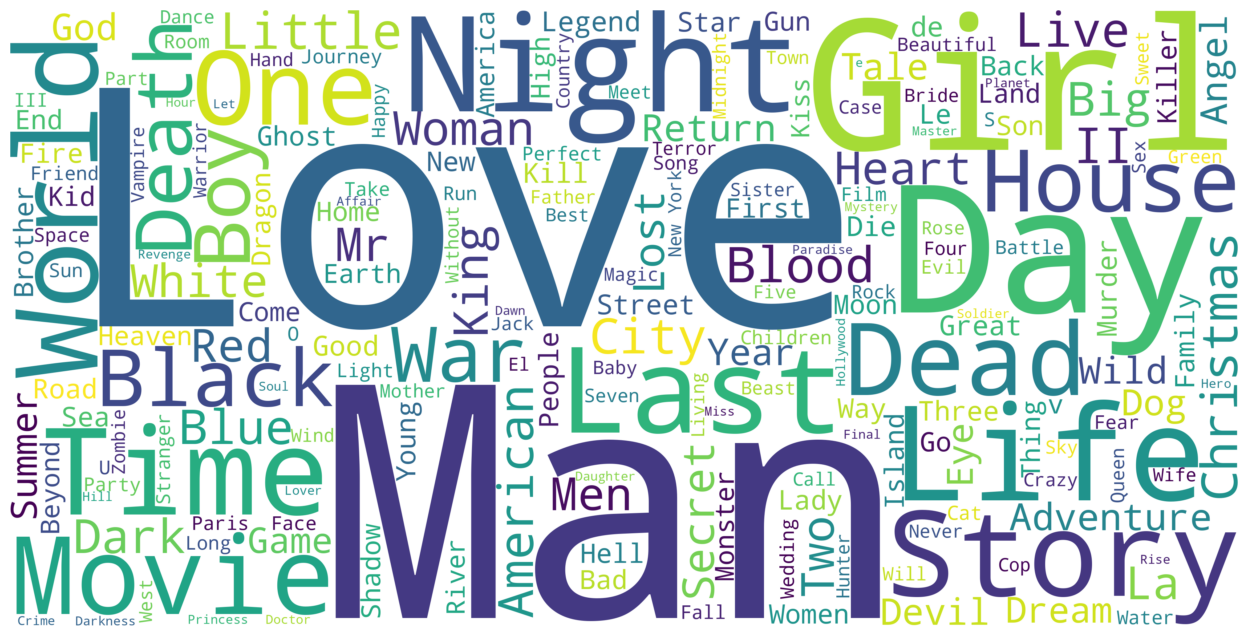

In [ ]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000,max_words=200).generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

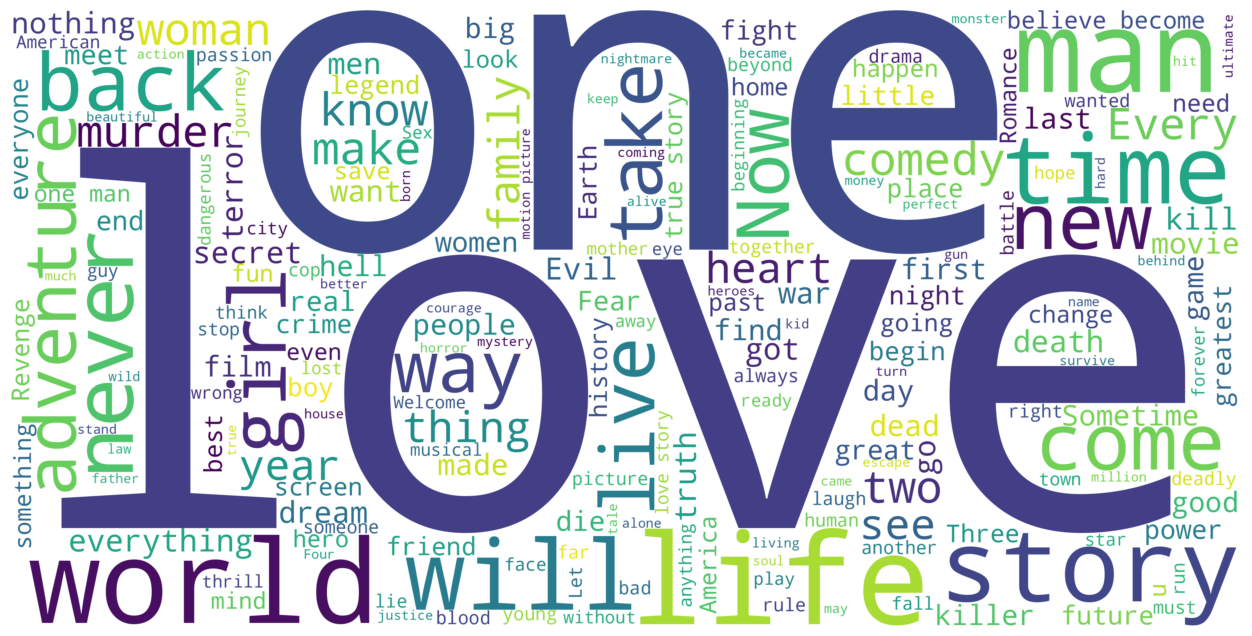

In [ ]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000,max_words=200).generate(taglines)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

# **Are Franchises More Successful ?**

In [ ]:
df['Franchise']=df['belongs_to_collection'].notna()

In [ ]:
df['belongs_to_collection'].value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [ ]:
df['Franchise'].value_counts()

Franchise
False    40228
True      4463
Name: count, dtype: int64

In [ ]:
# Revenue (Franchise Vs Standalone Movies)
df.groupby('Franchise')['revenue_musd'].sum()

Franchise
False    264251.059520
True     245082.416858
Name: revenue_musd, dtype: float64

In [ ]:
# Budget (Franchise Vs Standalone Movies)
df.groupby('Franchise')['budget_musd'].sum()

Franchise
False    131243.173823
True      60621.998159
Name: budget_musd, dtype: float64

In [ ]:
# Average Rating (Franchise Vs Standalone Movies)
df.groupby('Franchise')['vote_average'].mean()

Franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [ ]:
# Popularity (Franchise Vs Standalone Movies)
df.groupby('Franchise')['popularity'].mean()

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

In [ ]:
# Return Of Investments (Franchise Vs Standalone Movies)
df['ROI']=df['revenue_musd']/df['budget_musd']
df.groupby('Franchise')['ROI'].mean()

Franchise
False    6966.390650
True      856.404622
Name: ROI, dtype: float64

**Aggregate Functions **

In [ ]:
df['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [ ]:
franchises=df.groupby('Franchise').agg({'title':'count' , 'budget_musd':['sum','mean'],'revenue_musd':['sum','mean'],'vote_average':'mean',
    'popularity':'mean',
    'vote_count':['sum','mean']})
franchises

title    budget_musd              revenue_musd              \
           count            sum       mean            sum        mean   
Franchise                                                               
False      40228  131243.173823  18.047741  264251.059520   44.742814   
True        4463   60621.998159  38.319847  245082.416858  165.708193   

          vote_average popularity vote_count              
                  mean       mean        sum        mean  
Franchise                                                 
False         6.008787   2.592726  3149432.0   78.289550  
True          5.956806   6.245051  1840487.0  412.387856

In [ ]:
# Largest Franchise
fdf=df.dropna(subset=['belongs_to_collection'])
fdf.groupby('belongs_to_collection')['title'].count().sort_values(ascending=False).head(10)


belongs_to_collection
The Bowery Boys                           29
Totò Collection                           27
James Bond Collection                     26
Zatôichi: The Blind Swordsman             26
The Carry On Collection                   25
Charlie Chan (Sidney Toler) Collection    21
Pokémon Collection                        20
Godzilla (Showa) Collection               16
Dragon Ball Z (Movie) Collection          15
Charlie Chan (Warner Oland) Collection    15
Name: title, dtype: int64

In [ ]:
# Highest Revenue Franchise
fdf.groupby('belongs_to_collection')['revenue_musd'].sum().sort_values(ascending=False).head(10)

belongs_to_collection
Harry Potter Collection                7707.367425
Star Wars Collection                   7434.494790
James Bond Collection                  7106.970239
The Fast and the Furious Collection    5125.098793
Pirates of the Caribbean Collection    4521.576826
Transformers Collection                4366.101244
Despicable Me Collection               3691.070216
The Twilight Collection                3342.107290
Ice Age Collection                     3216.708553
Jurassic Park Collection               3031.484143
Name: revenue_musd, dtype: float64

In [ ]:
# Highest Average Revenue
fdf.groupby('belongs_to_collection').agg({'title':'count' , 'budget_musd':['sum','mean'],'revenue_musd':['sum','mean'],'vote_average':'mean',
    'popularity':'mean',
    'vote_count':['sum','mean']}).sort_values(('revenue_musd','mean'),ascending=False).head(10)

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Avatar Collection                       1      237.00  237.000000   
The Avengers Collection                 2      500.00  250.000000   
Frozen Collection                       2      150.00  150.000000   
Finding Nemo Collection                 2      294.00  147.000000   
The Hobbit Collection                   3      750.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
Despicable Me Collection                6      299.00   74.750000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Avatar Collection                    2787.965087  2787.965087     7.200000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
Frozen Collection                    1274.219009  1274.219009     7.100000   
Finding Nemo Collection              1968.906425   984.453213     7.200000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   

                                     popularity vote_count                
                                           mean        sum          mean  
belongs_to_collection                                                     
Avatar Collection                    185.070892    12114.0  12114.000000  
The Avengers Collection               63.633534    18908.0   9454.000000  
Frozen Collection                     16.878788     6070.0   3035.000000  
Finding Nemo Collection               19.987735    10625.0   5312.500000  
The Hobbit Collection                 25.205614    17944.0   5981.333333  
The Lord of the Rings Collection      30.272873    24759.0   8253.000000  
Harry Potter Collection               26.253893    47866.0   5983.250000  
Star Wars Collection                  23.410919    43443.0   5430.375000  
Despicable Me Collection             106.715961    18248.0   3041.333333  
Pirates of the Caribbean Collection   53.972237    25080.0   5016.000000

In [ ]:
# Most Expensive Franchises (Budget)
fdf.groupby('belongs_to_collection').agg({'title':'count' , 'budget_musd':['sum','mean'],'revenue_musd':['sum','mean'],'vote_average':'mean',
    'popularity':'mean',
    'vote_count':['sum','mean']}).sort_values(('budget_musd','sum'),ascending=False).head(10)

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
James Bond Collection                  26     1539.65   59.217308   
Harry Potter Collection                 8     1280.00  160.000000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
The Fast and the Furious Collection     8     1009.00  126.125000   
X-Men Collection                        6      983.00  163.833333   
Transformers Collection                 5      965.00  193.000000   
Star Wars Collection                    8      854.35  106.793750   
The Hobbit Collection                   3      750.00  250.000000   
The Terminator Collection               5      661.40  132.280000   
Mission: Impossible Collection          5      650.00  130.000000   

                                    revenue_musd             vote_average  \
                                             sum        mean         mean   
belongs_to_collection                                                       
James Bond Collection                7106.970239  273.345009     6.338462   
Harry Potter Collection              7707.367425  963.420928     7.537500   
Pirates of the Caribbean Collection  4521.576826  904.315365     6.880000   
The Fast and the Furious Collection  5125.098793  640.637349     6.662500   
X-Men Collection                     2808.832317  468.138720     6.816667   
Transformers Collection              4366.101244  873.220249     6.140000   
Star Wars Collection                 7434.494790  929.311849     7.375000   
The Hobbit Collection                2935.523356  978.507785     7.233333   
The Terminator Collection            1845.327738  369.065548     6.540000   
Mission: Impossible Collection       2778.977995  555.795599     6.600000   

                                    popularity vote_count               
                                          mean        sum         mean  
belongs_to_collection                                                   
James Bond Collection                13.453502    33392.0  1284.307692  
Harry Potter Collection              26.253893    47866.0  5983.250000  
Pirates of the Caribbean Collection  53.972237    25080.0  5016.000000  
The Fast and the Furious Collection  10.799435    25576.0  3197.000000  
X-Men Collection                      9.707541    27563.0  4593.833333  
Transformers Collection              14.425077    15232.0  3046.400000  
Star Wars Collection                 23.410919    43443.0  5430.375000  
The Hobbit Collection                25.205614    17944.0  5981.333333  
The Terminator Collection            21.893972    16832.0  3366.400000  
Mission: Impossible Collection       16.509710    14005.0  2801.000000

In [ ]:
# Highest Rated Franchises
fdf.groupby('belongs_to_collection').agg({'title':'count' , 'budget_musd':['sum','mean'],'revenue_musd':['sum','mean'],'vote_average':'mean',
    'popularity':'mean',
    'vote_count':['sum','mean']}).sort_values(('vote_count','mean'),ascending=False).head(10)

title budget_musd             revenue_musd  \
                                   count         sum        mean          sum   
belongs_to_collection                                                           
Avatar Collection                      1       237.0  237.000000  2787.965087   
Deadpool Collection                    1        58.0   58.000000   783.112979   
The Dark Knight Collection             3       585.0  195.000000  2463.716216   
The Avengers Collection                2       500.0  250.000000  2924.961604   
Iron Man Collection                    3       540.0  180.000000  2424.547547   
The Lord of the Rings Collection       3       266.0   88.666667  2916.544743   
Guardians of the Galaxy Collection     2       370.0  185.000000  1636.744770   
Captain America Collection             3       560.0  186.666667  2238.640841   
Man of Steel Collection                2       475.0  237.500000  1536.105712   
The Hunger Games Collection            4       490.0  122.500000  2944.162634   

                                                vote_average  popularity  \
                                           mean         mean        mean   
belongs_to_collection                                                      
Avatar Collection                   2787.965087     7.200000  185.070892   
Deadpool Collection                  783.112979     7.400000  187.860492   
The Dark Knight Collection           821.238739     7.800000   57.418393   
The Avengers Collection             1462.480802     7.350000   63.633534   
Iron Man Collection                  808.182516     6.933333   21.625895   
The Lord of the Rings Collection     972.181581     8.033333   30.272873   
Guardians of the Galaxy Collection   818.372385     7.750000  119.311296   
Captain America Collection           746.213614     7.100000   61.307807   
Man of Steel Collection              768.052856     6.100000   24.987357   
The Hunger Games Collection          736.040659     6.875000   54.766747   

                                   vote_count                
                                          sum          mean  
belongs_to_collection                                        
Avatar Collection                     12114.0  12114.000000  
Deadpool Collection                   11444.0  11444.000000  
The Dark Knight Collection            29043.0   9681.000000  
The Avengers Collection               18908.0   9454.000000  
Iron Man Collection                   24871.0   8290.333333  
The Lord of the Rings Collection      24759.0   8253.000000  
Guardians of the Galaxy Collection    14872.0   7436.000000  
Captain America Collection            20517.0   6839.000000  
Man of Steel Collection               13651.0   6825.500000  
The Hunger Games Collection           26174.0   6543.500000

# **Most Successful Directors**

In [ ]:
# Most Number Of Movies (top 5)
df['director'].value_counts().head(5)

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Name: count, dtype: int64

In [ ]:
# Highest Revenues By Directors
df.groupby('director').agg({'title':'count','revenue_musd':'sum'}).sort_values('revenue_musd',ascending=False).head(5)

,title,revenue_musd
director,,
Steven Spielberg,33,9256.621422
Peter Jackson,13,6528.244659
Michael Bay,13,6437.466781
James Cameron,11,5900.610310
David Yates,9,5334.563196


In [ ]:
# Highest Number of Franchises directed by Directors
fdf.groupby('director')['belongs_to_collection'].count().sort_values(ascending=False).head(5)

director
Gerald Thomas       25
William Beaudine    19
Ere Kokkonen        17
Kunihiko Yuyama     15
Robert Rodriguez    13
Name: belongs_to_collection, dtype: int64

**Aggregate Functions**

In [ ]:
directors = df.groupby('director').agg({
    'title' : 'count',
    'vote_count':'sum',
    'vote_average' : 'mean'
})
directors.head()

,title,vote_count,vote_average
director,,,
Dale Trevillion\t,2,4.0,4.0
Davide Manuli,1,10.0,6.9
E.W. Swackhamer,1,5.0,5.9
Vitaliy Vorobyov,1,3.0,5.5
Yeon Sang-Ho,4,1039.0,6.6


In [ ]:
# Highest Rated Movies
directors.loc[(directors['vote_count']>10000) & (directors['title']>10)].nlargest(20,'vote_average')

,title,vote_count,vote_average
director,,,
Hayao Miyazaki,14,14700.0,7.700000
Christopher Nolan,11,67344.0,7.618182
Martin Scorsese,39,35541.0,7.218421
Peter Jackson,13,47571.0,7.138462
Joel Coen,17,18139.0,7.023529
James Cameron,11,33736.0,6.927273
Stanley Kubrick,16,18214.0,6.912500
Steven Spielberg,33,62266.0,6.893939
Danny Boyle,14,16504.0,6.871429


**To find succesful director in any specific genre i.e. Action**

In [ ]:
gdf=df[df['genres'].notna()]
gdf[gdf['genres'].str.contains('Horror')].groupby('director')['revenue_musd'].sum().sort_values(ascending=False).head(10)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Name: revenue_musd, dtype: float64

# **To Find Successful Actors**

In [ ]:
df.set_index('id',inplace=True)
actors = df['cast'].str.split('|',expand=True)
actors.head()

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
actors = actors.stack().reset_index(drop=True,level=1)
actors=actors.to_frame()
actors.columns=['Actor']

Merge Dataframe with Actors DataFrame

In [ ]:
actors = actors.merge(df[['title','revenue_musd','vote_average','popularity']],on='id')
actors.head(10)

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
862,Tom Hanks,Toy Story,373.554033,7.7,21.946943
862,Tim Allen,Toy Story,373.554033,7.7,21.946943
862,Don Rickles,Toy Story,373.554033,7.7,21.946943
862,Jim Varney,Toy Story,373.554033,7.7,21.946943
862,Wallace Shawn,Toy Story,373.554033,7.7,21.946943
862,John Ratzenberger,Toy Story,373.554033,7.7,21.946943
862,Annie Potts,Toy Story,373.554033,7.7,21.946943
862,John Morris,Toy Story,373.554033,7.7,21.946943
862,Erik von Detten,Toy Story,373.554033,7.7,21.946943


In [ ]:
# Number of Unique Actors
actors['Actor'].nunique()

201501

In [ ]:
# Actors with highest number of movies
actors.groupby('Actor')['title'].count().sort_values(ascending=False).head(10)

Actor
Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Gérard Depardieu     109
John Carradine       109
Donald Sutherland    108
Jackie Chan          108
Frank Welker         107
Name: title, dtype: int64

In [ ]:
# Actors who have acted in more than 10 films
data = actors.groupby('Actor').agg(
        total_revenue = ('revenue_musd','sum'),
        average_rating = ('vote_average','mean'),
        average_popularity = ('popularity','mean'),
        movies = ('title','count'),
        average_revenue=('revenue_musd','mean')
)
data.loc[data['movies']>10]

,total_revenue,average_rating,average_popularity,movies,average_revenue
Actor,,,,,
'Snub' Pollard,20.450000,6.237500,2.849782,25,5.112500
50 Cent,1054.757779,5.856522,7.359971,23,81.135214
A Martinez,7.530283,5.733333,3.203481,11,3.765141
A.J. Buckley,332.405092,5.466667,2.476955,12,83.101273
A.J. Cook,115.618458,5.545455,5.061751,11,38.539486
...,...,...,...,...,...
Моррис Честнат,1066.420613,5.950000,7.089849,24,62.730624
Патрик О’Нил,235.940724,6.141176,4.113513,17,78.646908
Эрика Элениак,964.973095,5.628571,4.941197,14,192.994619


In [ ]:
# Actors who have acted in more than 10 films and Highest Revenue
actors_with_largest_revenue = data.loc[data['movies']>10].nlargest(10,'total_revenue')

In [ ]:
# Actors who have acted in more than 10 films and Highest Number of Films
actors_with_highest_movies =data.loc[data['movies']>10].nlargest(10,'movies')

In [ ]:
# Actors who have acted in more than 10 films and highest rating
actors_with_highest_rating =data.loc[data['movies']>10].nlargest(10,'average_rating')

In [ ]:
# Actors who have acted in more than 10 films   and popularity
actor_with_popularity  =data.loc[data['movies']>10].nlargest(10,'average_popularity')

**Find Common Actors in the top lists**

In [ ]:
top_list = pd.concat([actors_with_largest_revenue,actors_with_highest_movies,actors_with_highest_rating,actor_with_popularity])
top_list

,total_revenue,average_rating,average_popularity,movies,average_revenue
Actor,,,,,
Stan Lee,19414.957555,6.513043,29.936175,48,647.165252
Samuel L. Jackson,17109.620672,6.266116,11.703945,122,213.870258
Warwick Davis,13256.032188,6.294118,13.088614,34,662.801609
Frank Welker,13044.152470,6.310377,9.571404,107,326.103812
John Ratzenberger,12596.126073,6.484444,10.959477,46,449.861645
Jess Harnell,12234.608163,6.435294,10.919015,35,611.730408
Hugo Weaving,11027.578473,6.473684,10.967890,40,459.482436
Ian McKellen,11015.592318,6.353488,15.447180,44,478.938796
Johnny Depp,10653.760641,6.440580,12.378196,69,217.423687


In [ ]:
# Find Duplicate Records of Actors
top_list = top_list.reset_index()
top_list.loc[top_list.duplicated(subset='Actor')]

,level_0,index,Actor,total_revenue,average_rating,average_popularity,movies,average_revenue
13,13,13,Samuel L. Jackson,17109.620672,6.266116,11.703945,122,213.870258
19,19,19,Frank Welker,13044.152470,6.310377,9.571404,107,326.103812


# **GENRES**

What are the most successful/popular genres? Has this changed over time (e.g. 80ths vs. 90ths)?

In [ ]:
gen = df['genres'].str.split('|',expand=True)
gen = gen.stack().reset_index(drop=True,level=1).to_frame()
gen.columns = ['gen']
gen

,gen
id,
862,Animation
862,Comedy
862,Family
8844,Adventure
8844,Fantasy
...,...
439050,Family
111109,Drama
67758,Action


In [ ]:
genre = gen.merge(df[['title','revenue_musd','vote_average','popularity','release_date']],on='id')
genre

,gen,title,revenue_musd,vote_average,popularity,release_date
id,,,,,,
862,Animation,Toy Story,373.554033,7.7,21.946943,1995-10-30
862,Comedy,Toy Story,373.554033,7.7,21.946943,1995-10-30
862,Family,Toy Story,373.554033,7.7,21.946943,1995-10-30
8844,Adventure,Jumanji,262.797249,6.9,17.015539,1995-12-15
8844,Fantasy,Jumanji,262.797249,6.9,17.015539,1995-12-15
...,...,...,...,...,...,...
439050,Family,Subdue,NaN,4.0,0.072051,NaT
111109,Drama,Century of Birthing,NaN,9.0,0.178241,2011-11-17
67758,Action,Betrayal,NaN,3.8,0.903007,2003-08-01


In [ ]:
data_gen = genre.groupby('gen').agg(
    {
        'revenue_musd' : ['sum','mean'],
        'vote_average' : 'mean',
        'popularity' : 'mean'

    }
)

In [ ]:
# Genre With Highest Revenue
data_gen.sort_values(('revenue_musd','sum'),ascending=False).head(10)

revenue_musd             vote_average popularity
                           sum        mean         mean       mean
gen                                                               
Action           201388.050019  116.073804     5.751367   4.783477
Adventure        199978.669360  179.192356     5.881421   6.003722
Comedy           166845.045970   64.097213     5.967845   3.248691
Drama            160754.363574   43.826162     6.173677   3.029791
Thriller         129724.552970   69.520125     5.738379   4.506756
Family           107076.778493  159.103683     5.933220   4.765833
Fantasy          103920.152145  166.006633     5.929336   5.361045
Science Fiction   97847.960421  131.516076     5.476052   4.999308
Romance           73473.190426   51.272289     6.036092   3.143989
Animation         67432.971320  176.989426     6.448148   4.747663

In [ ]:
# Genre With Highest Rating
data_gen.sort_values(('vote_average','mean'),ascending=False).head(10)

revenue_musd             vote_average popularity
                       sum        mean         mean       mean
gen                                                           
Documentary    1449.112153    6.647303     6.656970   0.956166
Animation     67432.971320  176.989426     6.448148   4.747663
History       14902.198420   50.515927     6.412481   3.477655
Music         13370.292367   50.076001     6.331772   2.558967
War           15910.458263   65.475137     6.285647   3.345644
Drama        160754.363574   43.826162     6.173677   3.029791
Crime         63375.730411   58.518680     6.100048   4.154379
Romance       73473.190426   51.272289     6.036092   3.143989
Foreign         291.536311    3.512486     5.972989   0.768672
Comedy       166845.045970   64.097213     5.967845   3.248691

In [ ]:
# Genre With Highest Popularity
data_gen.nlargest(10,('popularity','mean'))

revenue_musd             vote_average popularity
                           sum        mean         mean       mean
gen                                                               
Adventure        199978.669360  179.192356     5.881421   6.003722
Fantasy          103920.152145  166.006633     5.929336   5.361045
Science Fiction   97847.960421  131.516076     5.476052   4.999308
Action           201388.050019  116.073804     5.751367   4.783477
Family           107076.778493  159.103683     5.933220   4.765833
Animation         67432.971320  176.989426     6.448148   4.747663
Thriller         129724.552970   69.520125     5.738379   4.506756
Crime             63375.730411   58.518680     6.100048   4.154379
Mystery           34754.614989   63.190209     5.960559   3.974673
Horror            30837.094673   41.955231     5.312182   3.581489

In [ ]:
# Highest revenue generated by Genre in 90's
nineties = genre.loc[genre['release_date'].between('1900-01-01','1999-12-31')]
nineties

,gen,title,revenue_musd,vote_average,popularity,release_date
id,,,,,,
862,Animation,Toy Story,373.554033,7.7,21.946943,1995-10-30
862,Comedy,Toy Story,373.554033,7.7,21.946943,1995-10-30
862,Family,Toy Story,373.554033,7.7,21.946943,1995-10-30
8844,Adventure,Jumanji,262.797249,6.9,17.015539,1995-12-15
8844,Fantasy,Jumanji,262.797249,6.9,17.015539,1995-12-15
...,...,...,...,...,...,...
84419,Thriller,House of Horrors,NaN,6.3,0.222814,1946-03-29
222848,Science Fiction,Caged Heat 3000,NaN,3.5,0.661558,1995-01-01
30840,Drama,Robin Hood,NaN,5.7,5.683753,1991-05-13


In [ ]:
# Popularity of Genres in Nineties
nineties.groupby('gen')['popularity'].mean().head(5)

gen
Action       3.316210
Adventure    3.799849
Animation    2.911722
Comedy       2.630019
Crime        3.223192
Name: popularity, dtype: float64

In [ ]:
# Highest revenue generated by Genre in 20's
twenties = genre.loc[genre['release_date'].between('2000-01-01','2022-12-31')]
twenties

,gen,title,revenue_musd,vote_average,popularity,release_date
id,,,,,,
131232,Drama,Two Friends,NaN,NaN,0.003949,2002-03-20
131232,Foreign,Two Friends,NaN,NaN,0.003949,2002-03-20
79782,Drama,Venice,NaN,7.5,0.147130,2010-05-25
79782,Romance,Venice,NaN,7.5,0.147130,2010-05-25
141210,Comedy,The Sleepover,NaN,8.0,0.135596,2013-10-12
...,...,...,...,...,...,...
289923,Horror,The Burkittsville 7,NaN,7.0,0.386450,2000-10-03
111109,Drama,Century of Birthing,NaN,9.0,0.178241,2011-11-17
67758,Action,Betrayal,NaN,3.8,0.903007,2003-08-01


In [ ]:
# Popularity of Genres in Twenties
twenties.groupby('gen')['popularity'].mean().head(5)

gen
Action       6.230310
Adventure    8.603134
Animation    5.919848
Comedy       3.814238
Crime        5.304302
Name: popularity, dtype: float64